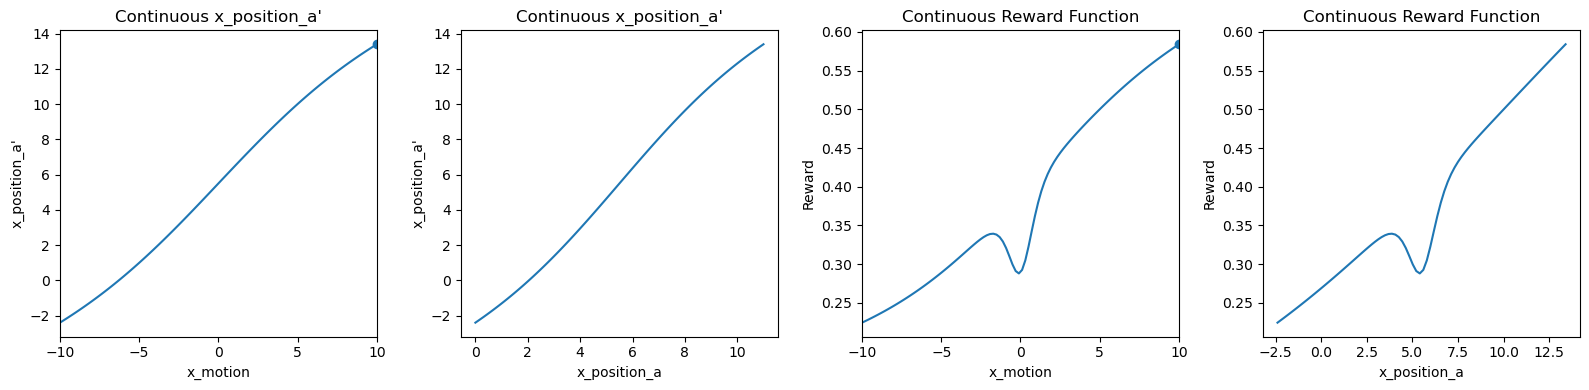

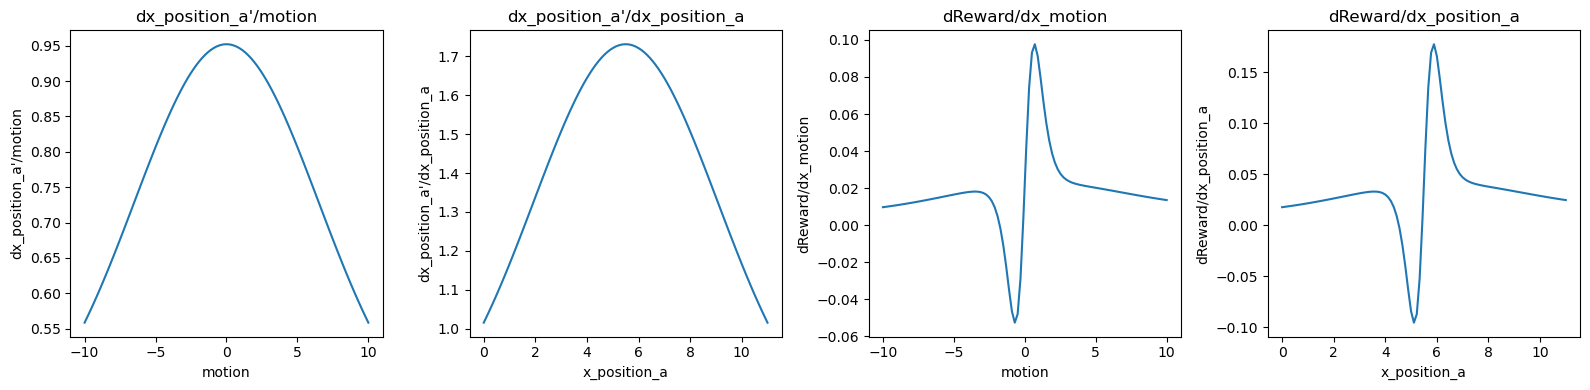

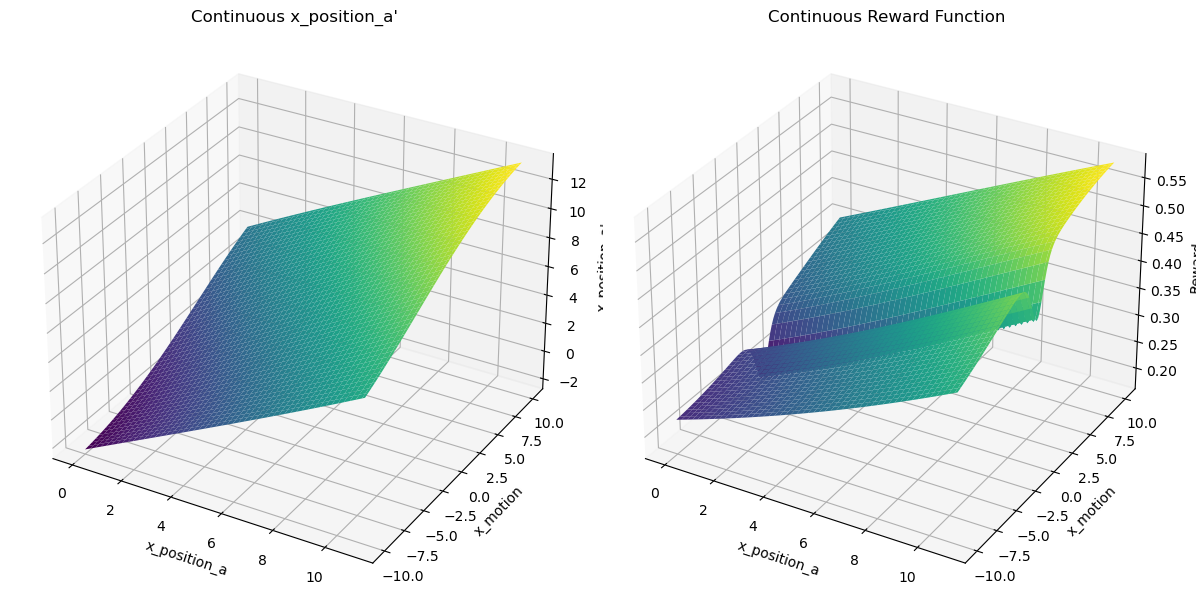

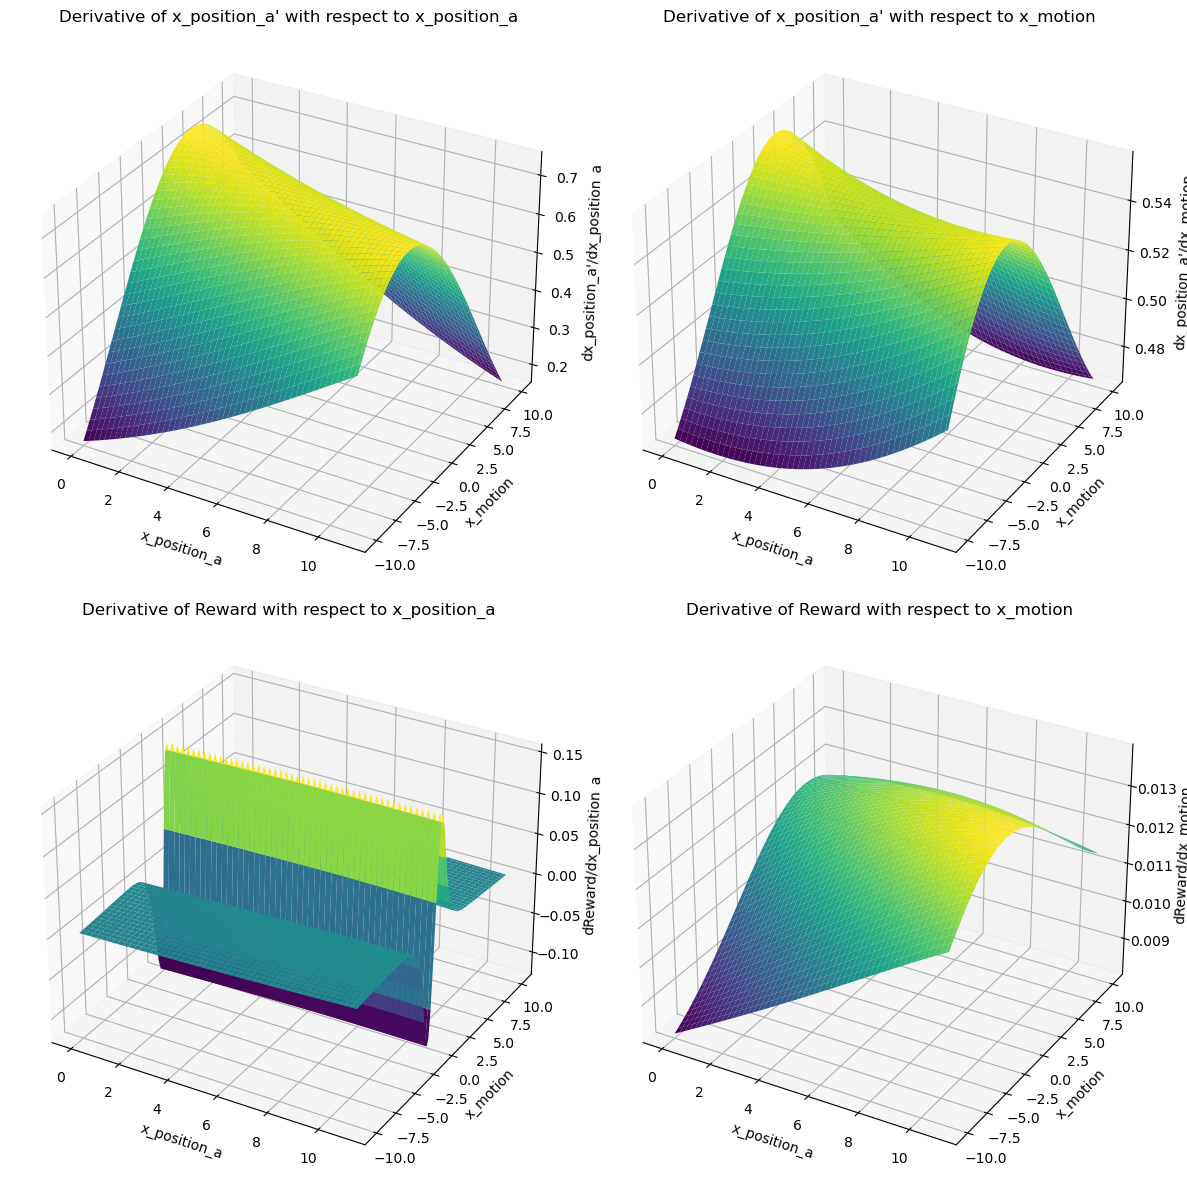

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import *
from mpl_toolkits.mplot3d import Axes3D

# Transformation functions
def tnorm(a, b):
    return a * b

def tconorm(a, b):
    return a + b - a * b

def sigmoid(x):
    x = WEIGHT*x
    return 1 / (1 + np.exp(-x))

# Functions to be transformed
def x_position_a_prime(x_position_a, x_motion, MAX_X):
    c = tconorm(sigmoid((x_position_a + x_motion) - MAX_X), sigmoid(0-(x_position_a + x_motion)))
    return c * x_position_a + (1 - c) * (x_position_a + x_motion)

def reward(x_position_a_prime, x_position_c, x_motion):
    return (sigmoid(x_position_a_prime - x_position_c)) - 0.1*(sech(-x_motion)**2); #0 * (tconorm(sigmoid(x_position_a_prime-MAX_X) ,sigmoid(0-x_position_a_prime) )))

# Parameters
MAX_X = 11
MOTION = 10.0
WEIGHT = 0.1
x_position_a_values = np.linspace(0, MAX_X, 100)
x_motion_values = np.linspace(-MOTION, MOTION, 100)
x_position_c = 10.0

# Calculate transformed functions
x_position_a_prime_values = [x_position_a_prime(x_position_a, x_motion, MAX_X) for x_position_a, x_motion in zip(x_position_a_values, x_motion_values)]
reward_values = [reward(x_pos_a_prime, x_position_c, x_motion) for x_pos_a_prime, x_motion in zip(x_position_a_prime_values, x_motion_values)]

# Create meshgrid for 3D plot
X, Y = np.meshgrid(x_position_a_values, x_motion_values)
x_position_a_prime_Z = np.array([x_position_a_prime(x_position_a, x_motion, MAX_X) for x_position_a, x_motion in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)
reward_Z = np.array([reward(x_pos_a_prime, x_position_c, x_motion) for x_pos_a_prime, x_motion in zip(np.ravel(x_position_a_prime_Z), np.ravel(Y))]).reshape(X.shape)

# Compute partial derivatives
x_position_a_prime_dX, x_position_a_prime_dY = np.gradient(x_position_a_prime_Z, x_position_a_values, x_motion_values, edge_order=2)
reward_dX, reward_dY = np.gradient(reward_Z, x_position_a_values, x_motion_values, edge_order=2)

# Compute derivatives
x_position_a_prime_derivative1 = np.gradient(x_position_a_prime_values, x_position_a_values, edge_order=2)
reward_derivative1 = np.gradient(reward_values, x_position_a_values, edge_order=2)

# Compute derivatives
x_position_a_prime_derivative2 = np.gradient(x_position_a_prime_values, x_motion_values, edge_order=2)
reward_derivative2 = np.gradient(reward_values, x_motion_values, edge_order=2)

def plot_continuous_functions(x_motion_values, x_position_a_values, x_position_a_prime_values, reward_values, MAX_X, MOTION):
    fig, axs = plt.subplots(1, 4, figsize=(16, 4))
    
    # Plot x_position_a' vs. x_motion
    ax1 = axs[0]
    ax1.plot(x_motion_values, x_position_a_prime_values)
    ax1.set_title("Continuous x_position_a'")
    ax1.set_xlabel('x_motion')
    ax1.set_ylabel("x_position_a'")
    xmax = x_motion_values[np.argmax(x_position_a_prime_values)]
    ymax = max(x_position_a_prime_values)
    ax1.scatter(xmax, ymax)
    ax1.set_xlim([max(-MAX_X, -MOTION), min(MAX_X, MOTION)])

    # Plot x_position_a' vs. x_position_a
    ax2 = axs[1]
    ax2.plot(x_position_a_values, x_position_a_prime_values)
    ax2.set_title("Continuous x_position_a'")
    ax2.set_xlabel('x_position_a')
    ax2.set_ylabel("x_position_a'")

    # Plot reward vs. x_motion
    ax3 = axs[2]
    ax3.plot(x_motion_values, reward_values)
    ax3.set_title('Continuous Reward Function')
    ax3.set_xlabel('x_motion')
    ax3.set_ylabel('Reward')
    xmax = x_motion_values[np.argmax(reward_values)]
    ymax = max(reward_values)
    ax3.scatter(xmax, ymax)
    ax3.set_xlim([max(-MAX_X, -MOTION), min(MAX_X, MOTION)])

    # Plot reward vs. x_position_a'
    ax4 = axs[3]
    ax4.plot(x_position_a_prime_values, reward_values)
    ax4.set_title('Continuous Reward Function')
    ax4.set_xlabel('x_position_a')
    ax4.set_ylabel('Reward')

    plt.tight_layout()
    plt.show()

def plot_functions_3D():
    # Plot the continuous functions in 3D
    fig = plt.figure(figsize=(12, 6))

    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.plot_surface(X, Y, x_position_a_prime_Z, cmap='viridis', edgecolor='none')
    ax1.set_title("Continuous x_position_a'")
    ax1.set_xlabel('x_position_a')
    ax1.set_ylabel('x_motion')
    ax1.set_zlabel("x_position_a'")

    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.plot_surface(X, Y, reward_Z, cmap='viridis', edgecolor='none')
    ax2.set_title('Continuous Reward Function')
    ax2.set_xlabel('x_position_a')
    ax2.set_ylabel('x_motion')
    ax2.set_zlabel('Reward')

    plt.tight_layout()
    plt.show()


def plot_derivatives_3D():
    # Plot the derivatives in 3D
    fig = plt.figure(figsize=(12, 12))

    ax1 = fig.add_subplot(2, 2, 1, projection='3d')
    ax1.plot_surface(X, Y, x_position_a_prime_dX, cmap='viridis', edgecolor='none')
    ax1.set_title("Derivative of x_position_a' with respect to x_position_a")
    ax1.set_xlabel('x_position_a')
    ax1.set_ylabel('x_motion')
    ax1.set_zlabel("dx_position_a'/dx_position_a")

    ax2 = fig.add_subplot(2, 2, 2, projection='3d')
    ax2.plot_surface(X, Y, x_position_a_prime_dY, cmap='viridis', edgecolor='none')
    ax2.set_title("Derivative of x_position_a' with respect to x_motion")
    ax2.set_xlabel('x_position_a')
    ax2.set_ylabel('x_motion')
    ax2.set_zlabel("dx_position_a'/dx_motion")

    ax3 = fig.add_subplot(2, 2, 3, projection='3d')
    ax3.plot_surface(X, Y, reward_dX, cmap='viridis', edgecolor='none')
    ax3.set_title('Derivative of Reward with respect to x_position_a')
    ax3.set_xlabel('x_position_a')
    ax3.set_ylabel('x_motion')
    ax3.set_zlabel("dReward/dx_position_a")

    ax4 = fig.add_subplot(2, 2, 4, projection='3d')
    ax4.plot_surface(X, Y, reward_dY, cmap='viridis', edgecolor='none')
    ax4.set_title('Derivative of Reward with respect to x_motion')
    ax4.set_xlabel('x_position_a')
    ax4.set_ylabel('x_motion')
    ax4.set_zlabel("dReward/dx_motion")

    plt.tight_layout()
    plt.show()


def plot_derivatives_2D():
    # Plot the derivatives
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 4, 2)
    plt.plot(x_position_a_values, x_position_a_prime_derivative1)
    plt.title("dx_position_a'/dx_position_a")
    plt.xlabel('x_position_a')
    plt.ylabel("dx_position_a'/dx_position_a")

    plt.subplot(1, 4, 4)
    plt.plot(x_position_a_values, reward_derivative1)
    plt.title('dReward/dx_position_a')
    plt.xlabel('x_position_a')
    plt.ylabel('dReward/dx_position_a')

    plt.subplot(1, 4, 1)
    plt.plot(x_motion_values, x_position_a_prime_derivative2)
    plt.title("dx_position_a'/motion")
    plt.xlabel('motion')
    plt.ylabel("dx_position_a'/motion")

    plt.subplot(1, 4, 3)
    plt.plot(x_motion_values, reward_derivative2)
    plt.title('dReward/dx_motion')
    plt.xlabel('motion')
    plt.ylabel('dReward/dx_motion')

    plt.tight_layout()
    plt.show()

# Plot the continuous functions
plot_continuous_functions(x_motion_values, x_position_a_values, x_position_a_prime_values, reward_values, MAX_X, MOTION)

plot_derivatives_2D()

plot_functions_3D()
plot_derivatives_3D()
